# EDA 

# Process Involved:
1. Numerical and Categorical  Feature Seperation
2. Zero Variance Analysis for Both the Features
3. Outliers Detection and Capping
4. Missing Value Treatment
5. ANOVA Analysis # Not done here
6. Standerdization

#### * Lets Start by Importing the Basic Libararies required, We'll import requried libararies at the requirement time only

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  #Suppressing Warnings

In [2]:
# Setting the pandas to view all the avialble column
pd.set_option('display.max_columns',None)

In [3]:
# Reading the data 
data = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


##### For data Processing, Lets Create a copy dataframe for our processing so that some data we dont lost

In [4]:
df = data.copy()
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


#### * As the CustomerID column is id based column and it will not help in our analysis neither in model building so lets drop it

In [5]:
df.drop(columns=['customerID'],axis=1,inplace=True)  

#### * We have to drop every row whoose target is not known

In [6]:
df.Churn.isnull().sum()  

0

AoA: As we can see there are no Null target so No action required, if there null target then we should have to drop that row =====
AoA(Action On Analysis)

#### * Before doing any analysis lets break our data into dependenet and Indenpendent Feature so that we could further break in into Numerical and Categorical Feature

In [7]:
df_Y =  df['Churn']

In [8]:
df_Y = pd.Series(np.where(df['Churn']=='Yes',1,0),name='Churn')

In [9]:
independant_features = [item for item in df.columns.to_list() if item != 'Churn']
df_X = df[independant_features]

In [10]:
df_X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5


#### * Let's Break it into Numerical and Categorical Variables

In [11]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


###### By Looking the above data, it looks like there is no null value and also there is three dataType variable available here

In [12]:
df_numerical = df_X.select_dtypes(include=['number'])
df_categorical = df_X.select_dtypes(include=["object"])

In [13]:

df_numerical.head(2)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95


In [14]:
df_categorical.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5


As we Can see there is One column which is Numerical but its data type is object so lets change the data type to Int and move to numerical Feature

In [15]:
df_categorical[df_categorical['TotalCharges']==' ']  # Like we can see we have some empty values which will cause issue while type conversion, So lets replace it with Random Number which is not in that series

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
488,Female,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),
753,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,
936,Female,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,
1082,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,
1340,Female,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),
3331,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,
3826,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,
4380,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,
5218,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,
6670,Female,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,


In [16]:
df_categorical.TotalCharges[df.TotalCharges=='55555'] # Verifing that there is no such value exist in that series

Series([], Name: TotalCharges, dtype: object)

In [17]:
# Replacing the value as Random value

df_categorical.TotalCharges.replace(to_replace=r'[^0-9\.]', value='55555', regex=True,inplace=True)
df_categorical.TotalCharges.replace(to_replace='', value='55555',inplace=True)

In [18]:
df_categorical[df_categorical['TotalCharges'] == ' '].shape # Cross Validating whether spaces are replaced or not 

(0, 16)

In [19]:
# Converting the data type 

df_categorical['TotalCharges'] = df_categorical['TotalCharges'].astype(float,errors='raise')


In [20]:
df_numerical['TotalCharges'] = df_categorical['TotalCharges']

df_categorical.drop(columns=['TotalCharges'],axis=1,inplace=True)

In [21]:
df_numerical.replace(to_replace=55555,value=np.NaN,inplace=True) # Removing that random number with Null for further treatment

##### It is common practise to view the set of values used in numerical Column, if those values are below 20 or nearby, That Numerical Column will behave like a Categorical variable
Let's find out is there any numerical values behaves like Categorical value

### Processing on Numerical Features

In [22]:
for item in df_numerical.columns.to_list():
    print(f"Column Name :=> {item}, Shape:=> {df[item].value_counts().shape}")

Column Name :=> SeniorCitizen, Shape:=> (2,)
Column Name :=> tenure, Shape:=> (73,)
Column Name :=> MonthlyCharges, Shape:=> (1585,)
Column Name :=> TotalCharges, Shape:=> (6531,)


##### We can see that there is one column => ***SeniorCitizen*** <= which has only 2 values so it will act like numerical value so lets cut and store in another dataframe called Indicator (as it is indicating to different behaviour)

In [23]:
df_indicator = df_numerical[['SeniorCitizen']]
df_numerical.drop(columns=['SeniorCitizen'],axis=1,inplace=True)

In [24]:
df_numerical.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


### Outlier Detection and Capping

In [25]:
df_numerical.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [26]:
def outlayer_capping(data=None,numerical_columns=None,multiplier=3,inplace=False):
    if data is None or numerical_columns is None:
        raise NotImplemented("No DataFrame passed or No Numerical Columns provided")
        return
    if inplace:
        df = data
    else:
        df = data.copy()
    for column in numerical_columns:
        stat = df[column].describe()
        # mask = breast_cancer['radius_mean'].between(stat['mean']-2*stat['std'],stat['mean']+2*stat['std'],inclusive='both')
        # IQR = stat['75%']-stat['25%']
        # value = stat['75%'] + 1.5*IQR
        mask  = (df[column]).le(stat['mean']-multiplier*stat['std'])
        (df[column])[mask] = stat['min']

        mask  = (df[column]).ge(stat['mean']+multiplier*stat['std'])
        (df[column])[mask] = stat['75%']
    if ~inplace:
        return df

In [27]:
outlayer_capping(data=df_numerical,numerical_columns=df_numerical.columns.to_list(),multiplier=3,inplace=True)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


### Missing Value Treatment

In [28]:
df_numerical.isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [29]:
df_numerical.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Fill with Median

In [30]:
df_numerical.TotalCharges.fillna(value=np.median(df_numerical.TotalCharges.mean()),inplace=True)

In [31]:
df_numerical.isnull().sum()  # Verifying

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

 Great We are done with Treatment with Numerical Feature. 

### Processing on Categorical Features

As we have indicator dataframe as well, Combining with Categorical dF

In [32]:
df_categorical = pd.concat([df_categorical,df_indicator],axis=1)

In [33]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


In [34]:
for item in df_categorical.columns.to_list():
    print(df_categorical[item].value_counts(),'\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    15

Looks good here, As we are not seeing any blank and spaces or niether special Characters


### Missing Value Treatment

In [35]:
df_categorical.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
SeniorCitizen       0
dtype: int64

Great!! We dont have any missing value for any categorical Columns

# Feature Engineering

## Feature Selection for **Numerical Features** 

In [36]:
df_numerical.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


#### 1. 0 Variance Check  

In [37]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(df_numerical)

array([[1.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.4000e+01, 5.6950e+01, 1.8895e+03],
       [2.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02],
       [4.0000e+00, 7.4400e+01, 3.0660e+02],
       [6.6000e+01, 1.0565e+02, 6.8445e+03]])

In [38]:
df_numerical_selected = df_numerical.iloc[:,selector.get_support(indices=True)]
df_numerical_selected.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


#### 2. Bi Variate Analysis (Feature Discretization)

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

discreate = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile',dtype=None)
df_numerical_binned = pd.DataFrame(discreate.fit_transform(df_numerical),index=df_numerical.index,columns=df_numerical.columns.to_list()).add_suffix('_Rank')

In [40]:
df_numerical_binned

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0
...,...,...,...
7038,4.0,6.0,5.0
7039,9.0,9.0,9.0
7040,2.0,2.0,2.0
7041,1.0,5.0,2.0


Combining with Y variable to See the relationship

In [41]:
X_bin_combined = pd.concat([df_numerical_binned,df_Y],axis=1)

In [42]:
X_bin_combined

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank,Churn
0,0.0,2.0,0.0,0
1,5.0,3.0,5.0,0
2,1.0,3.0,1.0,1
3,6.0,2.0,5.0,0
4,1.0,5.0,1.0,1
...,...,...,...,...
7038,4.0,6.0,5.0,0
7039,9.0,9.0,9.0,0
7040,2.0,2.0,2.0,0
7041,1.0,5.0,2.0,1


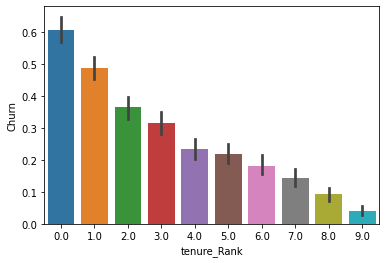

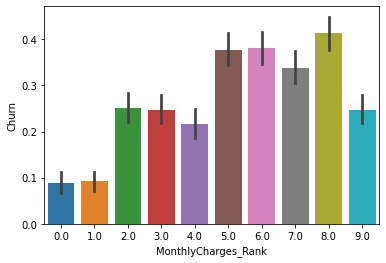

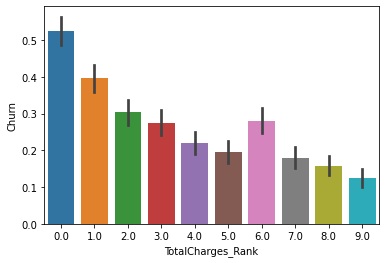

In [43]:
from numpy import mean,median
for col in (df_numerical_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_bin_combined, estimator=mean )
plt.show()

Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
           making it a good predictor

All features from **X_bin_combined** will get selected due to good discrimination, No feature Removed from first Selection (Part 1- 0 variance check)

In [44]:
# Final Numerical Features 
df_numerical_selected.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


## Feature Selection for **Categorical Features** 

### 1. Bi Variate Analysis

In [45]:
df_categorical_combined = pd.concat([df_categorical,df_Y],axis=1)

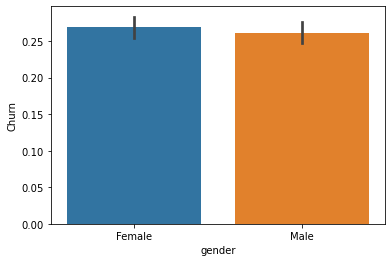

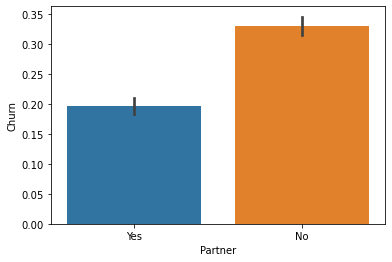

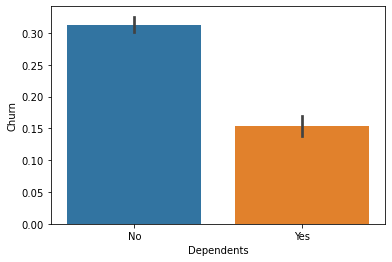

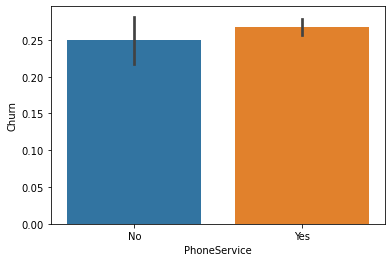

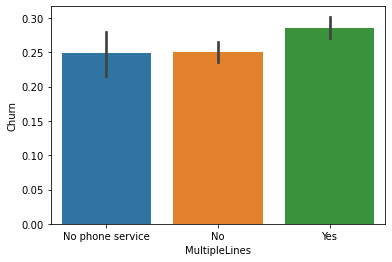

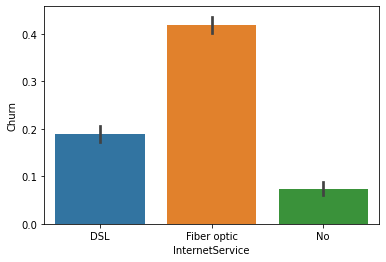

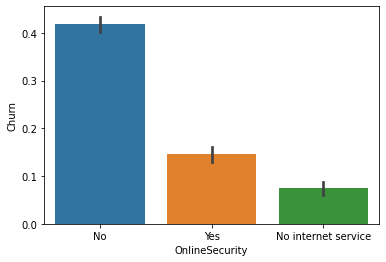

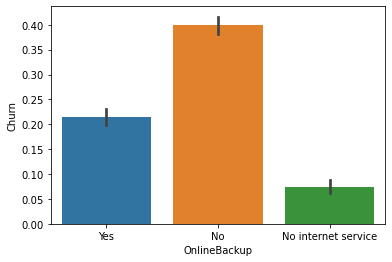

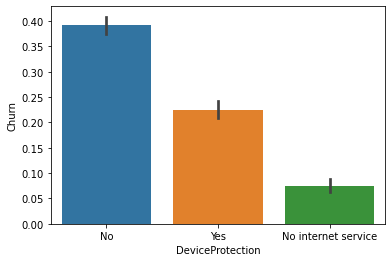

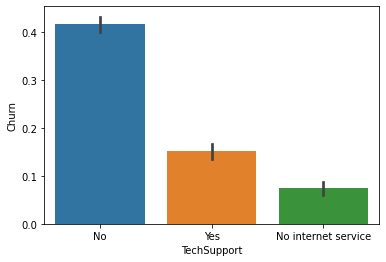

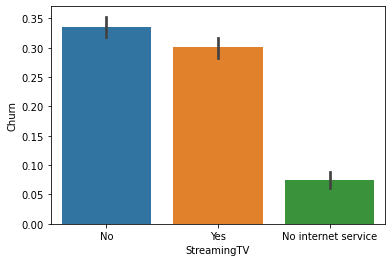

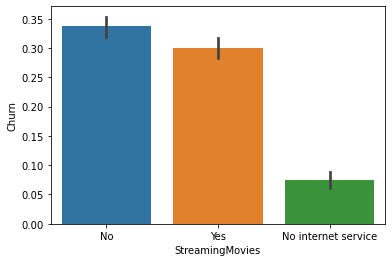

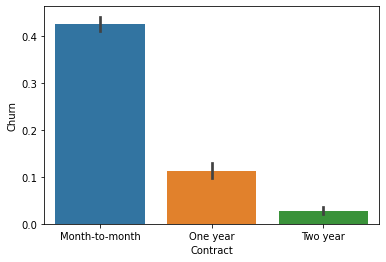

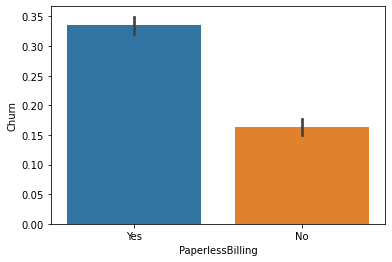

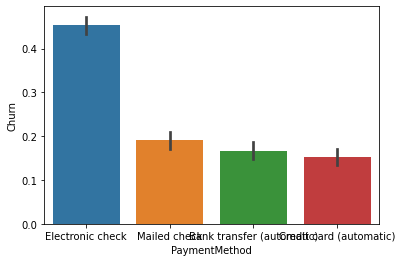

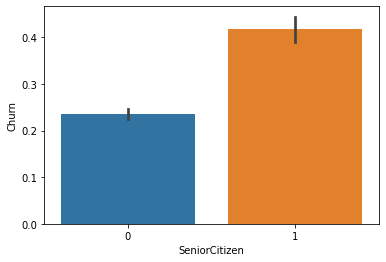

In [46]:
for col in (df_categorical.columns):
    plt.figure()
    sns.barplot(x=col,y="Churn",data=df_categorical_combined,estimator=mean)

As it seen, **Phoneservice, MultipleLines and Gender** are not able to help more on prediction. So lets drop those columns

In [47]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
pd.concat([data.customerID,df_numerical_selected,df_categorical,df_Y],axis=1).to_csv("dataset/cleaned_data.csv",index=False) # This dataset will be used for Final Comments

In [49]:
df_categorical.drop(columns=['gender','MultipleLines','PhoneService'],axis=1,inplace=True)

## One Hot Encoding 

In [50]:
df_categorical_encoded  = pd.get_dummies(df_categorical,drop_first=True)

### 2. Select K best Feature

In [51]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

selector = SelectKBest(score_func=chi2,k=20)
selector.fit_transform(df_categorical_encoded,df_Y)

selected_features = selector.get_support(indices=True)

df_categorical_selected = df_categorical_encoded.iloc[:,selected_features]

# Final Categorical dataframe is df_categorical-selected


## Standerization

Standerization is Required based on Algorithm

Final datframe for X

In [52]:
X = pd.concat([df_numerical_selected,df_categorical_selected],axis=1)
Y = df_Y

In [53]:
pd.concat([X,Y],axis=1).to_csv("dataset/processed_data.csv",index=False)

## Train - Test Split

In [54]:
pd.read_csv("dataset/processed_data.csv")

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0
7039,72,103.20,7362.90,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
7040,11,29.60,346.45,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


## Modeling

Please Proceed to Modelling Notebook 